<a href="https://colab.research.google.com/github/diontajones/GPA-Preditor/blob/main/GPA_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [ ]:
from google.colab import files
data_to_load = files.upload()
import io
df = pd.read_csv(io.BytesIO(data_to_load['sat_gpa_v1.csv']))

Saving sat_gpa_v1.csv to sat_gpa_v1.csv


In [ ]:
df.head()

,sat_sum,fy_gpa
0,1270,3.18
1,1220,3.33
2,1160,3.25
3,950,2.42
4,1070,2.63


In [ ]:
df.shape

(1000, 2)

# Scatter plot representing the relationship between GPA and SAT scores

[Text(0, 0.5, '')]

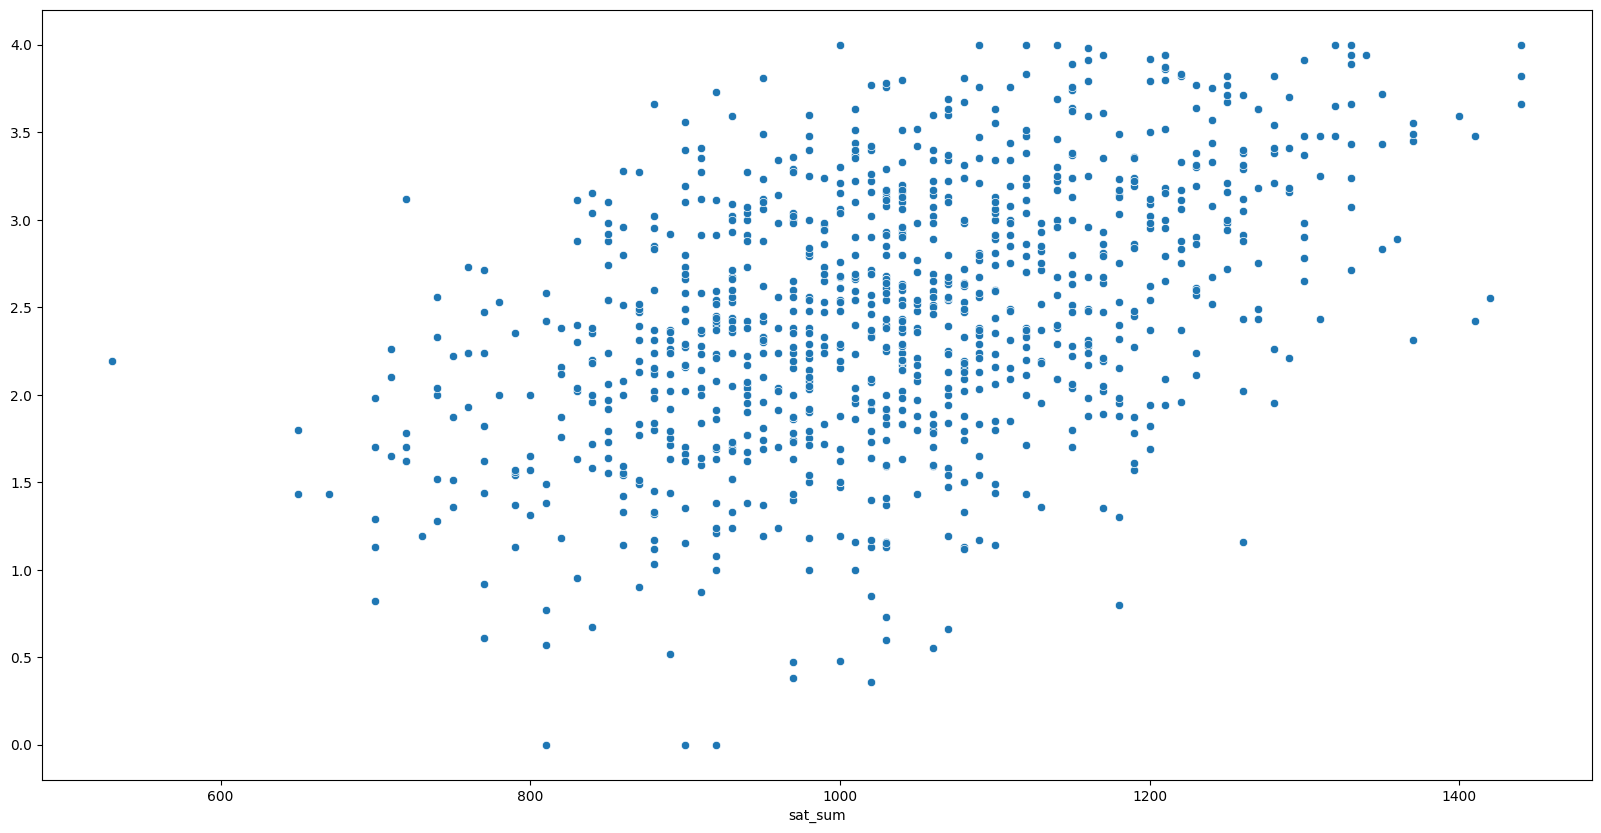

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(data=df, x="sat_sum", y="fy_gpa", legend=False)
ax.set(ylabel="")

## Statsmodel with Ordinary Least Square Regression and Summary

In [ ]:
y = df['fy_gpa']
x1 = df['sat_sum']

# define the intercept to the y line

x = sm.add_constant(x1)

results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 fy_gpa   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     268.3
Date:                Mon, 22 May 2023   Prob (F-statistic):           1.39e-53
Time:                        02:54:02   Log-Likelihood:                -999.38
No. Observations:                1000   AIC:                             2003.
Df Residuals:                     998   BIC:                             2013.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.152      0.013      0.990      -0.296       0.300
sat_sum        0.0024      0.000     16.379      0.000       0.002       0.003
==============================================================================
Omnibus:                       16.394   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.860
Skew:                          -0.318   Prob(JB):                     0.000218
Kurtosis:                       3.037   Cond. No.                     7.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear Regression with Regplot

Text(0.5, 1.0, 'Correlation between GPA & SAT Scores')

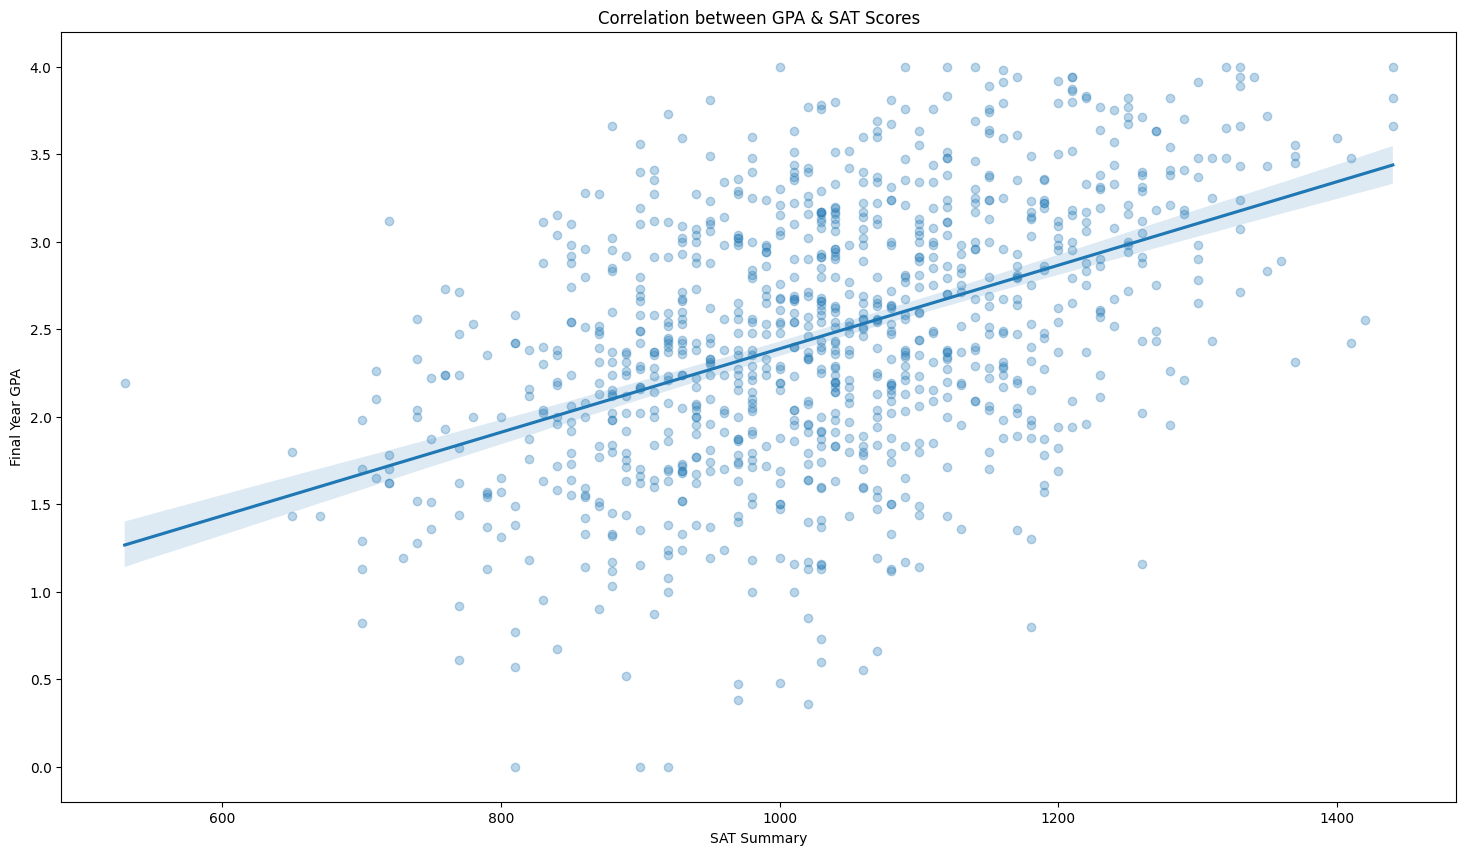

In [ ]:
plt.figure(figsize=(18,10))
sns.regplot(x='sat_sum', y='fy_gpa', data=df, scatter_kws={'alpha':0.3})
plt.xlabel('SAT Summary')
plt.ylabel('Final Year GPA')
plt.title('Correlation between GPA & SAT Scores')

## Linear Regression with lmplot

Text(0.5, 1.0, 'Correlation between GPA & SAT Scores')

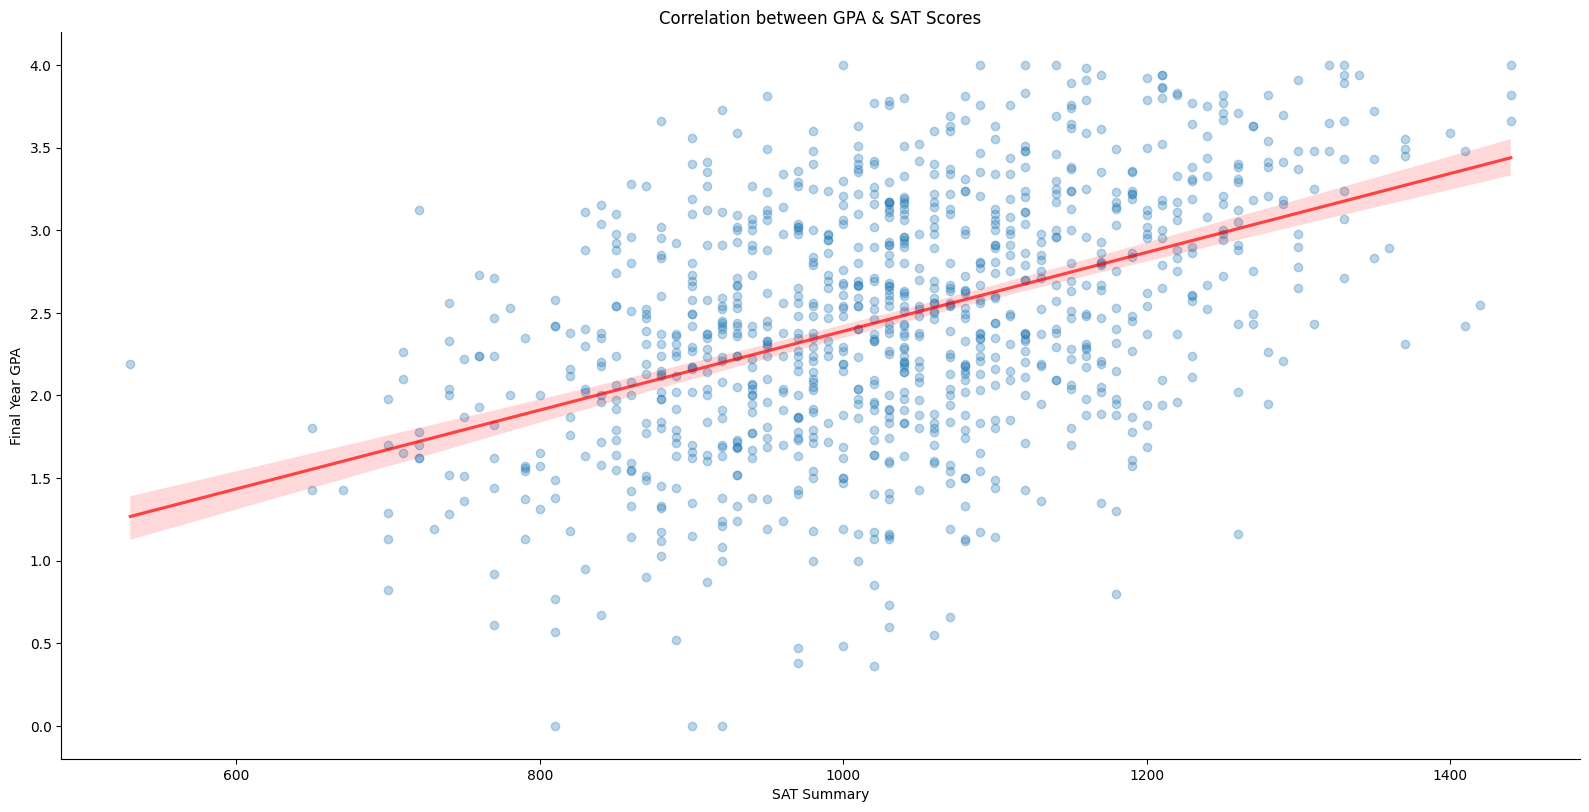

In [ ]:
sns.lmplot(x='sat_sum', y='fy_gpa', data=df, height=8, aspect=2,
           scatter_kws={'alpha':0.3},
           line_kws=dict(alpha=0.7, color='red'))
plt.xlabel('SAT Summary')
plt.ylabel('Final Year GPA')
plt.title('Correlation between GPA & SAT Scores')

## Scatter plot with Created Regression Line

Text(0, 0.5, 'GPA')

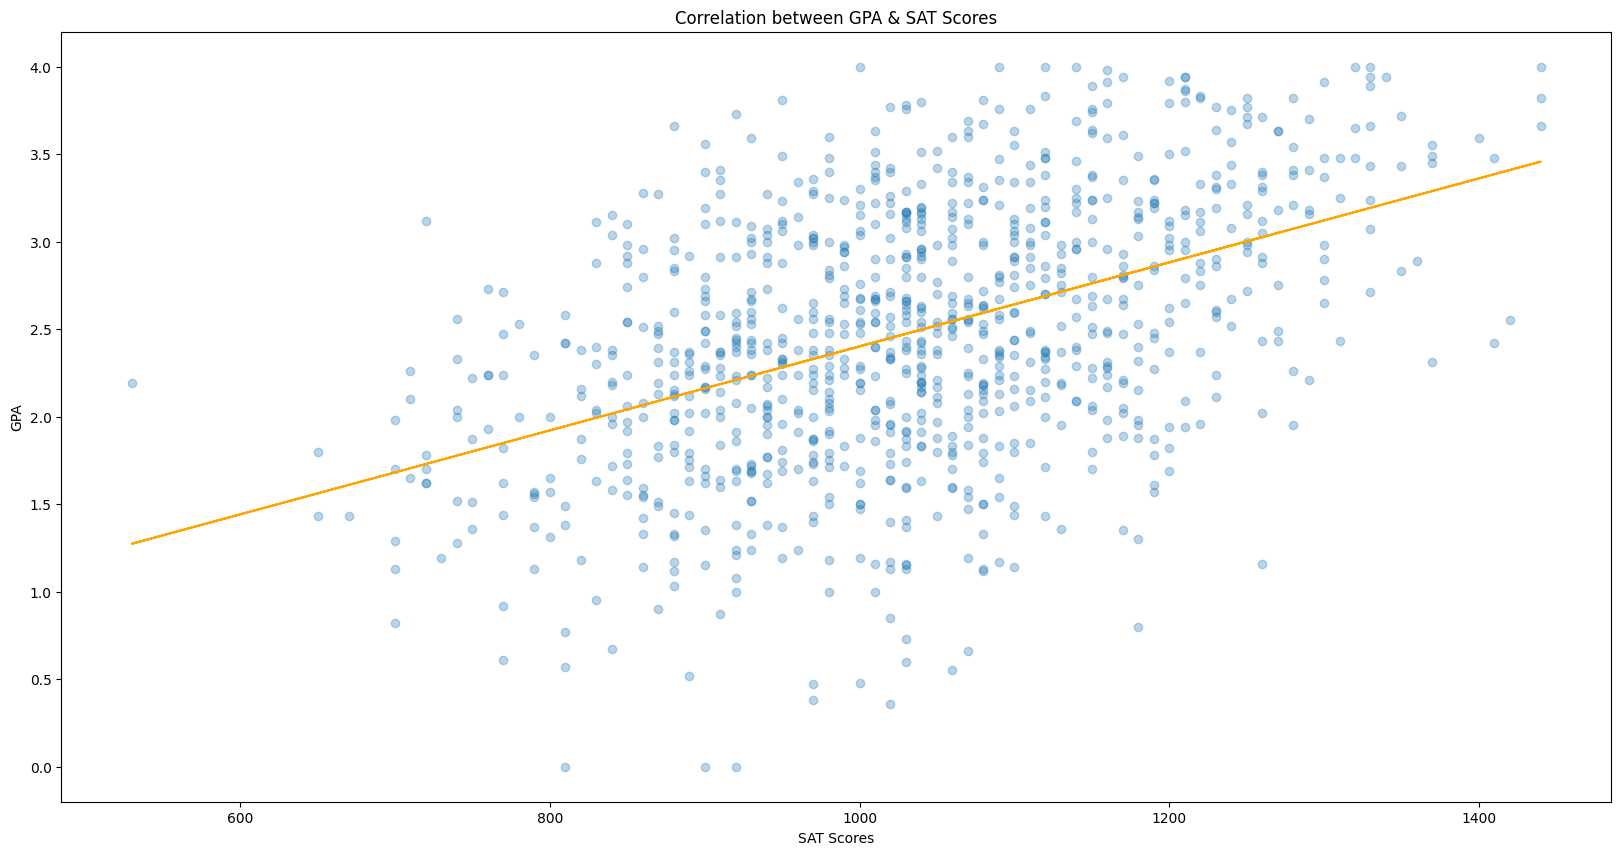

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(x1, y, alpha=0.3)
plt.xlabel('SAT Scores')
plt.ylabel('GPA')
plt.title('Correlation between GPA & SAT Scores')

yhat = 0.0024 * x1 + 0.0019
fig = plt.plot(x1, yhat, c='orange', label='regression')
plt.xlabel('SAT Scores')
plt.ylabel('GPA')

## Statistical Interpretation

R-squared : Measure of how well the regression line approximates the data points. If .5 then that is a sign that half of the observed variation can be explained by the models inputs. 1 would be perfectly correlated.

With the R-squared being 0.212, evaluating the slope and seeing the data points increase across the x axis, there is a decent relation but there must be other variables to predict GPA